In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import requests

climate_api = "https://api.mosqlimate.org/api/datastore/climate/"

page = 1 # total amount of pages is returned in the request
per_page = 100
pagination = f"?page={page}&per_page={per_page}&"
filters = "start=%s&end=%s" % ("2024-06-01", "2024-08-12")

resp = requests.get(climate_api + pagination + filters)

# Or you can add a geocode to the filters
geocode = 1302603
resp = requests.get(
    climate_api + 
    pagination + 
    filters +
    f"&geocode={geocode}"
)

items = resp.json()["items"] # JSON data in dict format
resp.json()["pagination"] # Pagination*

{'items': 73, 'total_items': 73, 'page': 1, 'total_pages': 1, 'per_page': 100}

In [4]:
page = 1 # total amount of pages is returned in the request
per_page = 100
pagination = f"?page={page}&per_page={per_page}&"
filters = "start=%s&end=%s" % ("2017-01-01", "2021-12-31")

resp = requests.get(climate_api + pagination + filters)

# Or you can add a geocode to the filters
geocode = 1302603
resp = requests.get(
    climate_api + 
    pagination + 
    filters +
    f"&geocode={geocode}"
)

items = resp.json()["items"] # JSON data in dict format
#total_items = resp.json()["total_items"] # JSON data in dict format
resp.json()["pagination"] # Pagination*

{'items': 100,
 'total_items': 1826,
 'page': 1,
 'total_pages': 19,
 'per_page': 100}

In [5]:
df = pd.DataFrame(items)
df

,date,geocodigo,temp_min,temp_med,temp_max,precip_min,precip_med,precip_max,precip_tot,pressao_min,pressao_med,pressao_max,umid_min,umid_med,umid_max
0,2017-01-01,1302603,23.6111,25.3502,27.7248,0.1231,0.5659,1.3036,4.5273,0.9960,0.9983,1.0013,79.6839,90.0431,99.0368
1,2017-01-02,1302603,24.0199,26.1471,29.4771,0.0000,0.2304,1.6464,1.8431,0.9945,0.9979,1.0004,72.0835,87.2796,97.3930
2,2017-01-03,1302603,23.1482,25.8223,29.4092,0.0140,0.9063,3.2519,7.2501,0.9935,0.9974,0.9997,67.4282,84.7726,93.5927
3,2017-01-04,1302603,24.4720,26.4360,28.7671,0.0000,0.2244,0.5448,1.7950,0.9929,0.9965,0.9996,73.6756,84.6681,93.5752
4,2017-01-05,1302603,24.0013,26.6296,30.2719,0.0022,0.3966,1.6309,3.1725,0.9935,0.9962,0.9990,67.6898,83.8311,93.7440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-04-06,1302603,24.1933,25.9811,27.8978,0.0022,0.3656,1.2173,2.9252,0.9959,0.9991,1.0014,79.5860,88.1609,94.4391
96,2017-04-07,1302603,23.9427,26.3988,30.3345,0.0535,0.2279,0.4623,1.8230,0.9942,0.9977,1.0000,72.9401,87.4330,97.2660
97,2017-04-08,1302603,24.3814,25.7652,27.3958,0.0003,0.3098,1.0608,2.4787,0.9936,0.9969,0.9994,79.9364,87.5490,96.0499
98,2017-04-09,1302603,23.9278,26.3449,29.6006,0.0014,0.2418,0.8104,1.9343,0.9933,0.9965,0.9989,70.0808,85.5653,96.2795


In [6]:
pages = np.arange(1, 20) # total amount of pages is returned in the request
per_page = 100
for page in pages:
    pagination = f"?page={page}&per_page={per_page}&"
    filters = "start=%s&end=%s" % ("2017-01-01", "2021-12-31")

    resp = requests.get(climate_api + pagination + filters)

# Or you can add a geocode to the filters
geocode = 1302603
resp = requests.get(
    climate_api + 
    pagination + 
    filters +
    f"&geocode={geocode}"
)

items = resp.json()["items"] # JSON data in dict format
#total_items = resp.json()["total_items"] # JSON data in dict format
resp.json()["pagination"] # Pagination*

{'items': 26,
 'total_items': 1826,
 'page': 19,
 'total_pages': 19,
 'per_page': 100}

In [7]:
per_page = 100
total_pages = 19 
start_date = "2017-01-01"
end_date = "2021-12-31"
geocode = 1302603

all_items = []  # List to store all items

# Loop through each page
for page in range(1, total_pages + 1):
    pagination = f"?page={page}&per_page={per_page}&"
    filters = f"start={start_date}&end={end_date}&geocode={geocode}"
    
    resp = requests.get(climate_api + pagination + filters)
    
    # Check if the request was successful
    if resp.status_code == 200:
        items = resp.json().get("items", [])  # Get items, default to an empty list if key not found
        all_items.extend(items)  # Append the items from this page to the list
    else:
        print(f"Failed to retrieve data for page {page}")
        break  # Break the loop in case of a failed request

df = pd.DataFrame(all_items)
df

,date,geocodigo,temp_min,temp_med,temp_max,precip_min,precip_med,precip_max,precip_tot,pressao_min,pressao_med,pressao_max,umid_min,umid_med,umid_max
0,2017-01-01,1302603,23.6111,25.3502,27.7248,0.1231,0.5659,1.3036,4.5273,0.9960,0.9983,1.0013,79.6839,90.0431,99.0368
1,2017-01-02,1302603,24.0199,26.1471,29.4771,0.0000,0.2304,1.6464,1.8431,0.9945,0.9979,1.0004,72.0835,87.2796,97.3930
2,2017-01-03,1302603,23.1482,25.8223,29.4092,0.0140,0.9063,3.2519,7.2501,0.9935,0.9974,0.9997,67.4282,84.7726,93.5927
3,2017-01-04,1302603,24.4720,26.4360,28.7671,0.0000,0.2244,0.5448,1.7950,0.9929,0.9965,0.9996,73.6756,84.6681,93.5752
4,2017-01-05,1302603,24.0013,26.6296,30.2719,0.0022,0.3966,1.6309,3.1725,0.9935,0.9962,0.9990,67.6898,83.8311,93.7440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-12-27,1302603,23.9273,25.7716,27.6912,0.0000,0.6288,2.7231,5.0304,0.9945,0.9964,0.9992,86.0339,89.9206,93.5145
1822,2021-12-28,1302603,22.9484,25.9423,31.5794,0.0003,0.1879,1.2172,1.5033,0.9945,0.9967,0.9993,65.6959,85.8707,96.1019
1823,2021-12-29,1302603,24.7293,27.4349,31.0417,0.0000,0.0930,0.6209,0.7437,0.9939,0.9969,0.9985,66.3288,82.4274,93.6948
1824,2021-12-30,1302603,24.3319,25.5776,27.5484,0.0000,1.2250,5.8845,9.8002,0.9956,0.9970,0.9986,81.8586,90.1047,93.3572


In [9]:
datetime_df = pd.DataFrame()
datetime_df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
datetime_df['year'] = datetime_df['date'].dt.year

# Count the occurrences of each year
year_counts = datetime_df['year'].value_counts().sort_index()

print(year_counts)

2017    365
2018    365
2019    365
2020    366
2021    365
Name: year, dtype: int64


In [10]:
datetime_df

,date,year
0,2017-01-01,2017
1,2017-01-02,2017
2,2017-01-03,2017
3,2017-01-04,2017
4,2017-01-05,2017
...,...,...
1821,2021-12-27,2021
1822,2021-12-28,2021
1823,2021-12-29,2021
1824,2021-12-30,2021


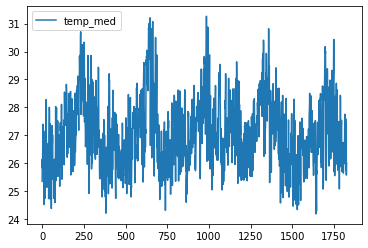

In [11]:
df.plot(kind='line', y='temp_med');
plt.show()

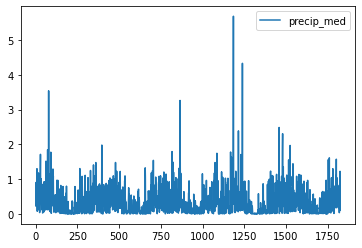

In [12]:
df.plot(kind='line', y='precip_med');
plt.show()